# The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\Flight_Booking.csv')

In [3]:
df=df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#Loading the data
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
#Now, we need to check the missing values in a dataframe
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

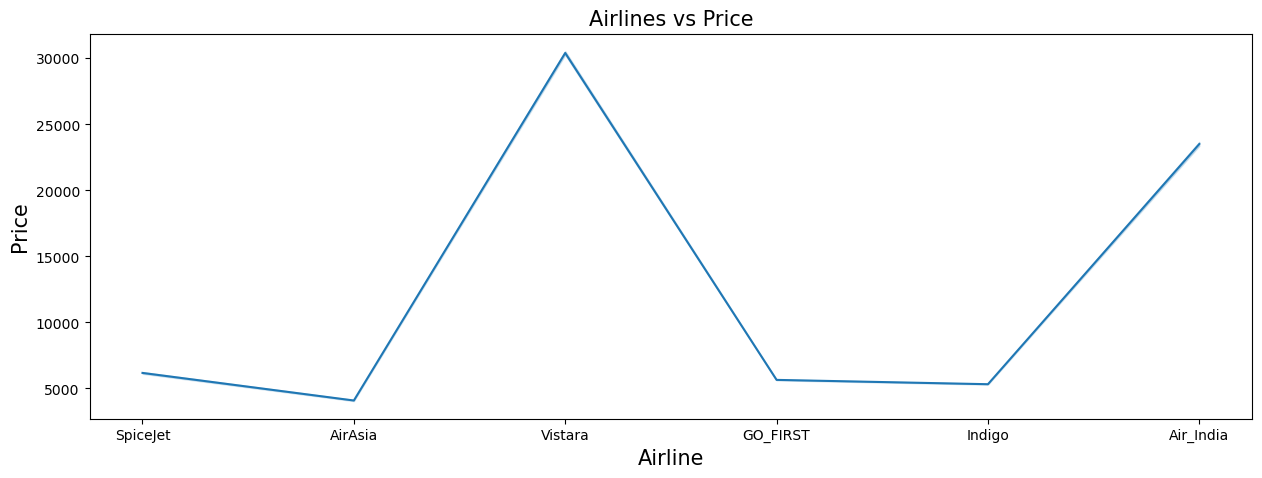

In [6]:
#There is a variation in price with different airlines, so we will visualize the data
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines vs Price', fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

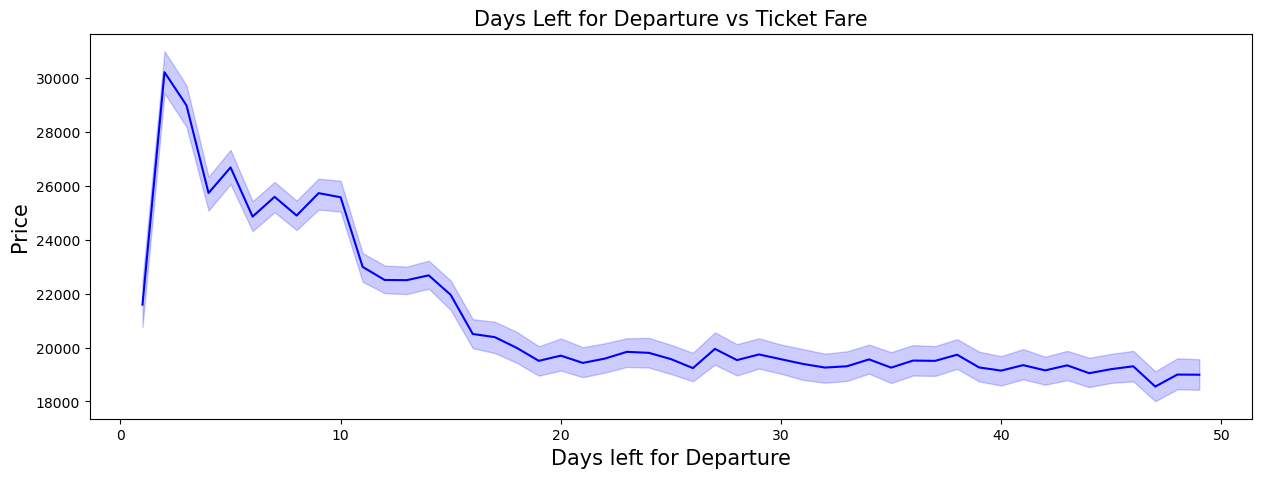

In [7]:
#The price of the ticket increases as the days left for departure decreases
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left for Departure vs Ticket Fare', fontsize=15)
plt.xlabel('Days left for Departure', fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

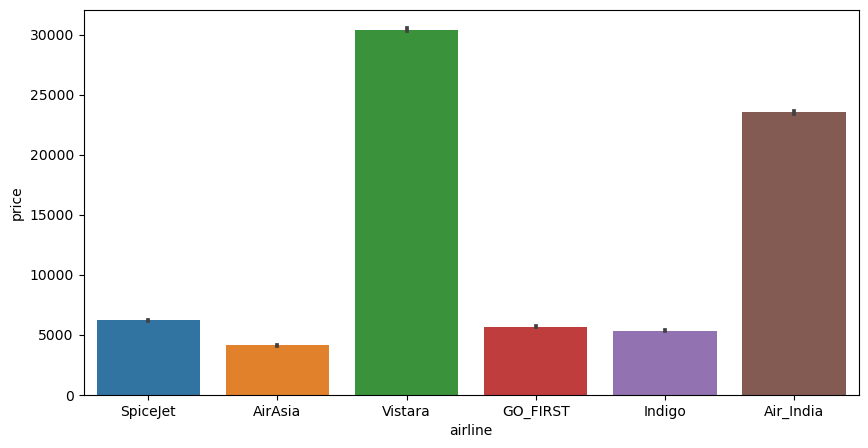

In [8]:
#Visualizing Price range of all the flights
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df)

<Axes: xlabel='class', ylabel='price'>

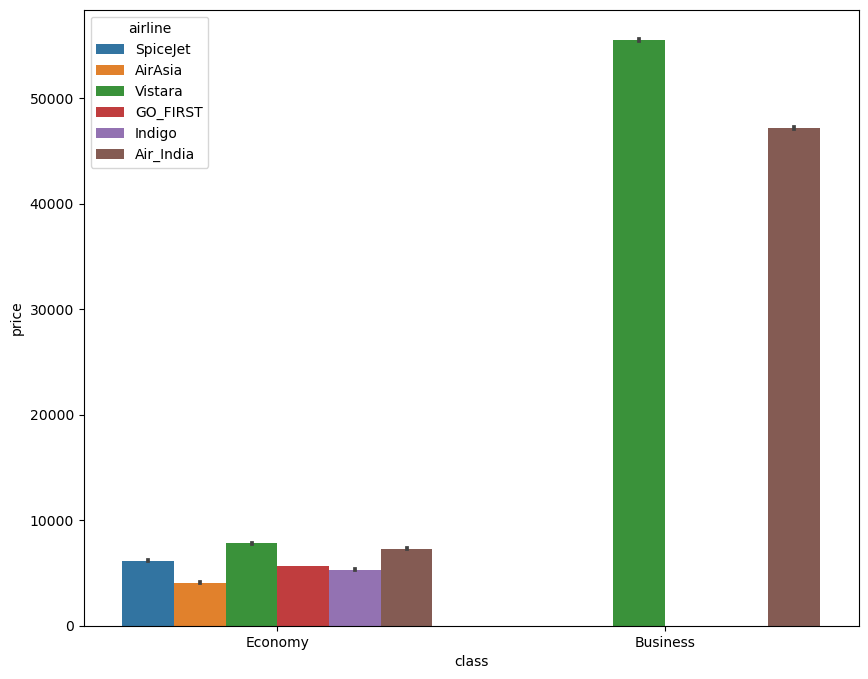

In [9]:
#Range of price of all the flights of Economy and Business class
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price',data=df,hue='airline')

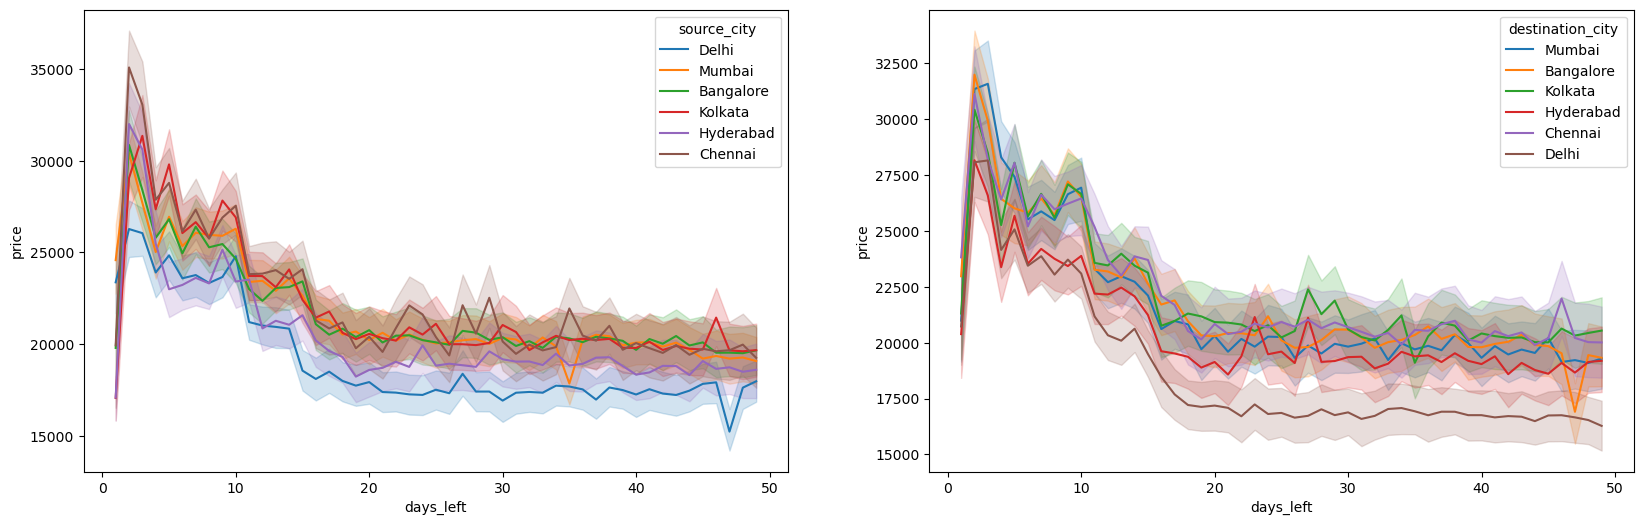

In [10]:
# Range of price of flights with source and destination city according to the days left
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

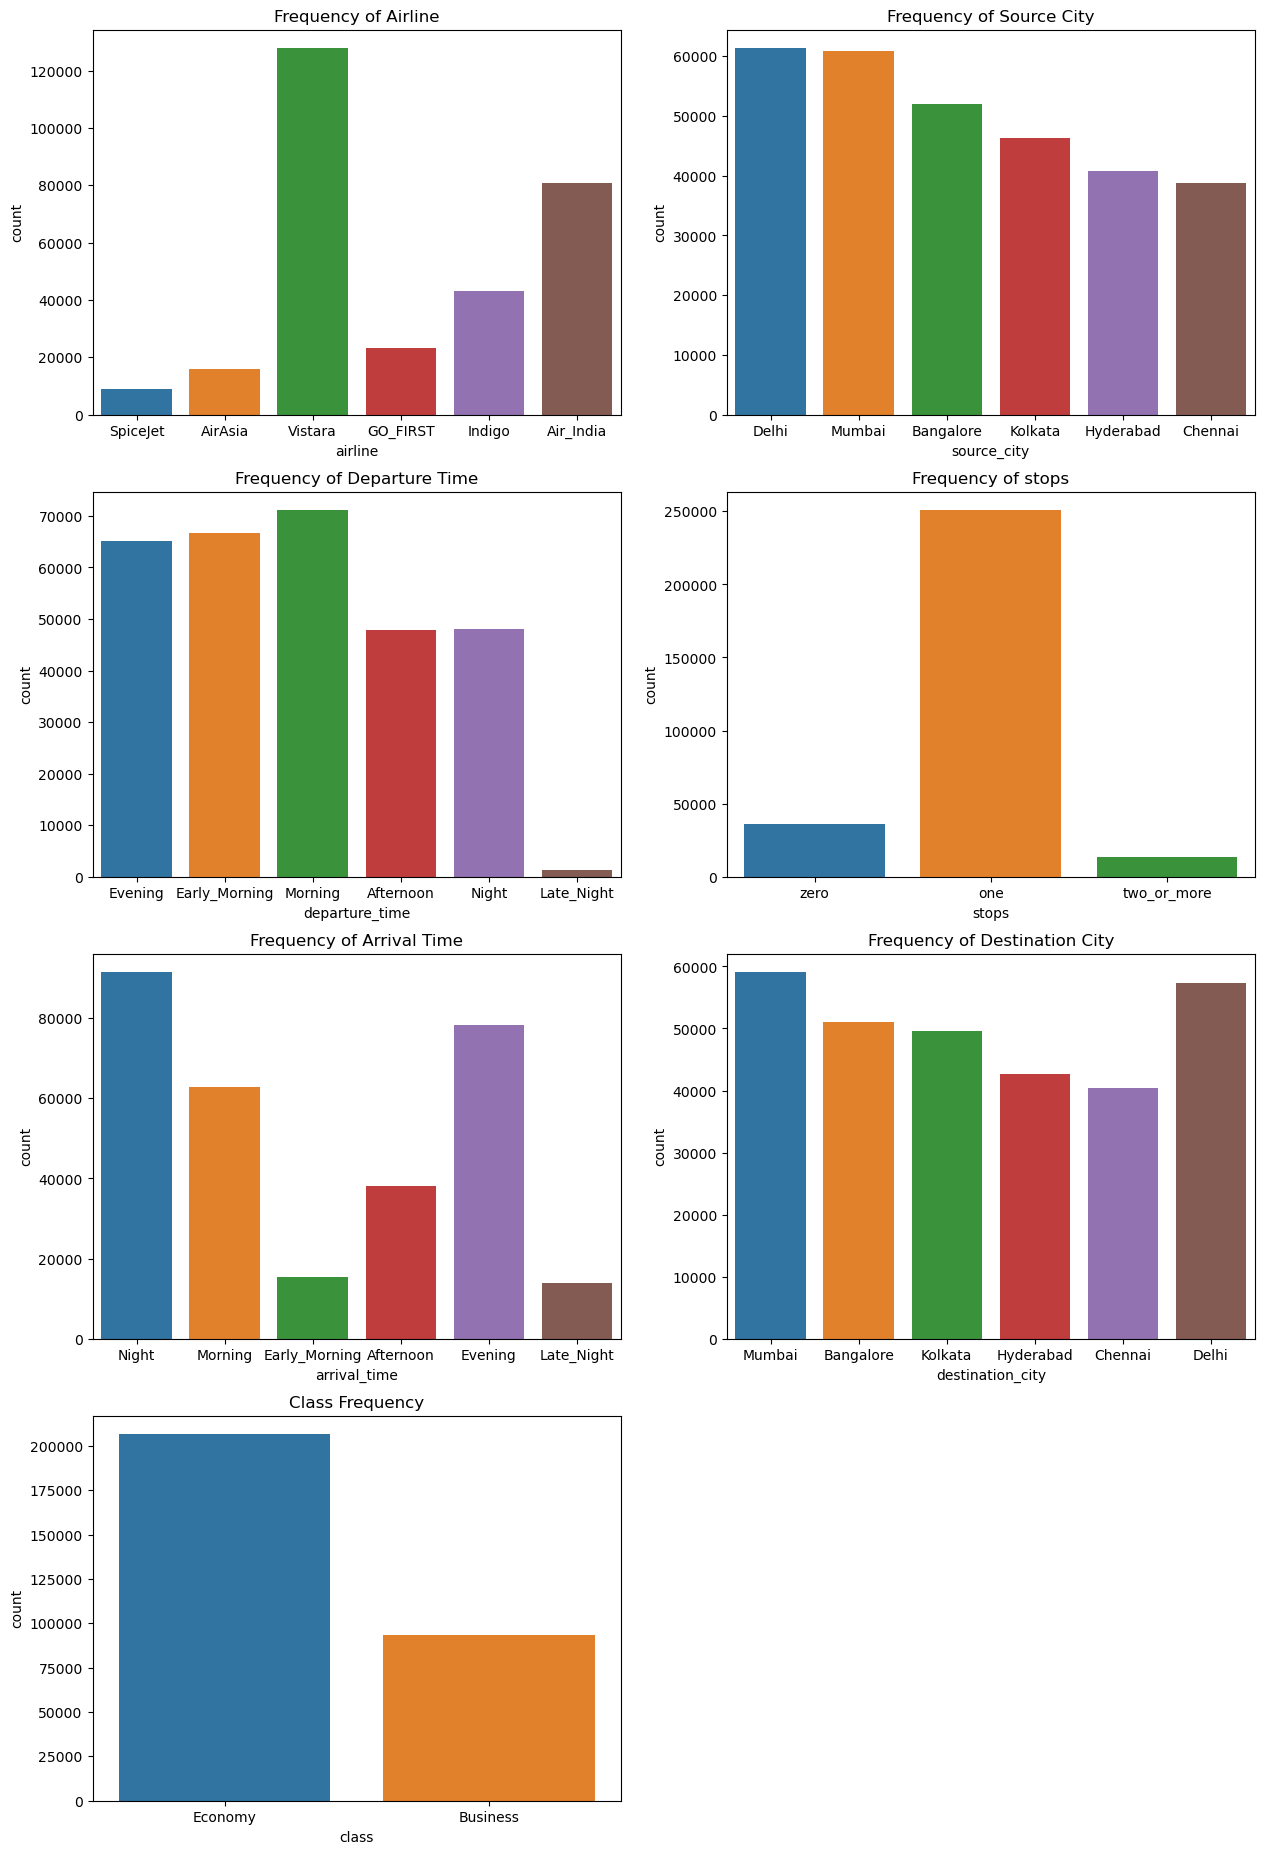

In [11]:
#Visualization of categorical features with countplot
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")

plt.subplot(4,2,2)
sns.countplot(x=df["source_city"],data=df)
plt.title("Frequency of Source City")

plt.subplot(4,2,3)
sns.countplot(x=df["departure_time"],data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4,2,4)
sns.countplot(x=df["stops"],data=df)
plt.title("Frequency of stops")


plt.subplot(4,2,5)
sns.countplot(x=df["arrival_time"],data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4,2,6)
sns.countplot(x=df["destination_city"],data=df)
plt.title("Frequency of Destination City")


plt.subplot(4,2,7)
sns.countplot(x=df["class"],data=df)
plt.title("Class Frequency")

plt.show()

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["stops"]=le.fit_transform(df["stops"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


C:\Users\Dell\AppData\Local\Temp\ipykernel_12236\1898718698.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


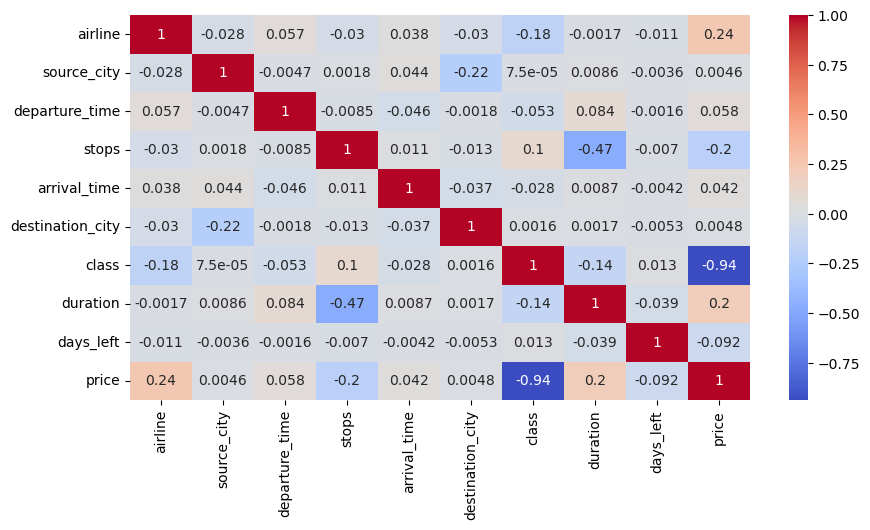

In [13]:
#Feature Selection----plotting the correlation graph to see the correlation between features and dependent variable.

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

# Feature Selection

In [14]:
#Selecting the features using VIF.VIF should be less than 5.So drop the stops feature.

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if ((df[col].dtype != 'object')& (col!='price')):
        col_list.append(col)

X = df[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i)
                        for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


# Using Linear Regression

Applying standardization and implementing Linear Regression Model to predict the price of a flight.

In [15]:
# X=df.drop(columns=["price"])
# y=df['price']
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# # Assuming 'x_train' contains categorical columns that need encoding

# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)
# from sklearn.linear_model import LinearRegression
# lr=LinearRegression()
# lr.fit(x_train,y_train)
# y_pred=lr.predict(X_test)
# difference=pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_Value","Predicted_Value"])
# difference

In [32]:
# import numpy as np
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# # Assuming 'df' is your DataFrame containing both numerical and categorical columns

# # Separate the target variable
X = df.drop(columns=["price"])
y = df['price']

# # Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# # Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Apply StandardScaler to the numerical features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# # Train the linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# # Make predictions on the test set
y_pred = lr.predict(x_test)

# # Create a DataFrame to show the difference between actual and predicted values
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual_Value", "Predicted_Value"])
difference


,Actual_Value,Predicted_Value
0,7366.0,5386.080191
1,64831.0,56265.330191
2,6195.0,12615.580191
3,60160.0,53592.830191
4,6578.0,11054.580191
...,...,...
60026,5026.0,4472.080191
60027,3001.0,3255.580191
60028,6734.0,6411.080191
60029,5082.0,3434.580191


In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


-1.9735290406219464e+18

In [47]:
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

225476598849.17224

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

1.017319236813997e+27

In [49]:
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

31895442257695.645

C:\Users\Dell\AppData\Local\Temp\ipykernel_12236\1514020514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\Dell\AppData\Local\Temp\ipykernel_12236\1514020514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


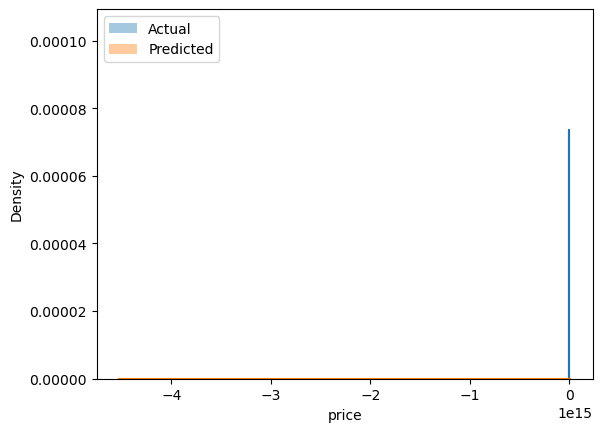

In [54]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

3001.8381110381315